In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Delaunay
import itertools

In [37]:
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1],[2,1],[1,2]])
tri = Delaunay(points)

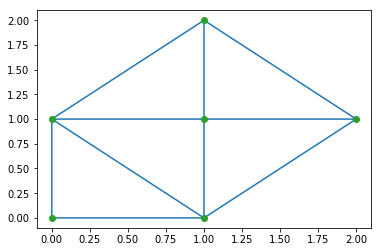

In [38]:
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [65]:
points[tri.simplices[0]]

array([[1, 2],
       [1, 1],
       [2, 1]])

In [63]:
tri.neighbors[1][tri.neighbors[1]>-1]

array([0, 3], dtype=int32)

In [64]:
points[tri.simplices[3]]

array([[0, 1],
       [1, 0],
       [1, 1]])

In [57]:
def finde_nachbardreiecke(dindex,tri): #dindex ist der Dreiecksindex
    nachbarn = []
    for comb in itertools.combinations(tri.simplices[dindex], 2): #für alle Kanten
        for sid in range(0,len(tri.simplices)): #für alle Simplexindizes
            if((len(set(comb)-set(tri.simplices[sid])) == 0) 
                  & (not np.array_equal(tri.simplices[dindex],tri.simplices[sid]))): #Sind an dem Dreieck tri.simplices[sid] alle Kanten aus 'comb' beteiligt?
                nachbarn.append(sid)#Dann ist tri.simplices[sid] ein Nachbardreieck von tri.simplices[dindex]
    return nachbarn

In [61]:
finde_nachbardreiecke(1,tri)

[3, 0]

In [ ]:
#offensichtlich korrekt, aber bestimmt langsamer